<a href="https://colab.research.google.com/github/DivyaDharshini2293/Deep-Learning/blob/main/RNN_using_TensorFlow_Keras_Custom_Dataset_Email_Spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data=pd.read_csv("https://raw.githubusercontent.com/soaicbe/ml/master/spam.csv")
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
data['Category']=data['Category'].map({'spam' : True , 'ham' : False})
data['Category']

0       False
1       False
2        True
3       False
4       False
        ...  
5567     True
5568    False
5569    False
5570    False
5571    False
Name: Category, Length: 5572, dtype: bool

In [ ]:
data['Message'] = data['Message'].str.lower()

In [ ]:
X_train = data['Message']
y_train = data['Category']

In [ ]:
X_train

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                 will ü b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: Message, Length: 5572, dtype: object

In [ ]:
y_train

0       False
1       False
2        True
3       False
4       False
        ...  
5567     True
5568    False
5569    False
5570    False
5571    False
Name: Category, Length: 5572, dtype: bool

## 3. Building the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input

model = Sequential()
model.add(Input(shape=(1,), dtype="string"))

### 3.1 Text Vectorization

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

max_tokens = 5000
max_len = 10
vectorize_layer = TextVectorization(
  # Max vocab size. Any words outside of the max_tokens most common ones
  # will be treated the same way: as "out of vocabulary" (OOV) tokens.
  max_tokens=max_tokens,
  # Output integer indices, one per string token
  output_mode="int",
  # Always pad or truncate to exactly this many tokens
  output_sequence_length=max_len,
)

In [ ]:
# Call adapt(), which fits the TextVectorization layer to our text dataset.
# This is when the max_tokens most common words (i.e. the vocabulary) are selected.
vectorize_layer.adapt(X_train)

In [ ]:
reverse_word_index = vectorize_layer.get_vocabulary()
reverse_word_index

['',
 '[UNK]',
 'to',
 'i',
 'you',
 'a',
 'the',
 'u',
 'and',
 'is',
 'in',
 'me',
 'my',
 'for',
 'your',
 'it',
 'of',
 'call',
 'have',
 'on',
 'that',
 'are',
 '2',
 'now',
 'im',
 'so',
 'not',
 'but',
 'or',
 'can',
 'at',
 'do',
 'ur',
 'get',
 'be',
 'will',
 'if',
 'with',
 'just',
 'we',
 'no',
 'this',
 'its',
 'up',
 '4',
 'dont',
 'when',
 'go',
 'ok',
 'from',
 'ltgt',
 'free',
 'all',
 'out',
 'how',
 'what',
 'know',
 'like',
 'ill',
 'got',
 'good',
 'then',
 'was',
 'come',
 'am',
 'only',
 'time',
 'day',
 'love',
 'there',
 'want',
 'send',
 'text',
 'he',
 'as',
 'by',
 'one',
 'going',
 'ü',
 'need',
 'about',
 'txt',
 'home',
 'lor',
 'see',
 'sorry',
 'still',
 'r',
 'stop',
 'back',
 'our',
 'n',
 'reply',
 'today',
 'mobile',
 'tell',
 'new',
 'well',
 'later',
 'hi',
 'think',
 'she',
 'da',
 'been',
 'any',
 'please',
 'take',
 'they',
 'phone',
 'her',
 'cant',
 'did',
 'some',
 'here',
 'has',
 'week',
 'night',
 'an',
 'who',
 'oh',
 'much',
 'hey',
 'g

In [ ]:
vectorize_layer.get_weights()

[array([b'to', b'i', b'you', ..., b'tocallshall', b'tobed', b'tobacco'],
       dtype=object)]

In [ ]:
model.add(vectorize_layer)

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_2 (Text  (None, 10)                0         
 Vectorization)                                                  
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 3.2 Embedding

In [ ]:
from tensorflow.keras.layers import Embedding

# Note that we're using max_tokens + 1 here, since there's an
# out-of-vocabulary (OOV) token that gets added to the vocab.
model.add(Embedding(max_tokens + 1, 100))

## 3.3 The Recurrent Layer

In [ ]:
from tensorflow.keras.layers import LSTM, SimpleRNN

# 64 is the "units" parameter, which is the
# dimensionality of the output space.
model.add(LSTM(16))
# model.add(SimpleRNN(16))

In [ ]:
from tensorflow.keras.layers import Dense

model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_2 (Text  (None, 10)                0         
 Vectorization)                                                  
                                                                 
 embedding_4 (Embedding)     (None, 10, 100)           500100    
                                                                 
 lstm_2 (LSTM)               (None, 16)                7488      
                                                                 
 dense_8 (Dense)             (None, 16)                272       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 507877 (1.94 MB)
Trainable params: 507877 (1.94 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

## 4. Compiling the Model


In [ ]:
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)

## 4. Compiling the Model


In [ ]:
history = model.fit(X_train, y_train, epochs=100)


Epoch 1/100
175/175 [==============================] - 7s 19ms/step - loss: 0.2573 - accuracy: 0.9174
Epoch 2/100
175/175 [==============================] - 3s 19ms/step - loss: 0.0697 - accuracy: 0.9819
Epoch 3/100
175/175 [==============================] - 3s 19ms/step - loss: 0.0334 - accuracy: 0.9910
Epoch 4/100
175/175 [==============================] - 5s 27ms/step - loss: 0.0183 - accuracy: 0.9957
Epoch 5/100
175/175 [==============================] - 3s 19ms/step - loss: 0.0122 - accuracy: 0.9966
Epoch 6/100
175/175 [==============================] - 3s 18ms/step - loss: 0.0065 - accuracy: 0.9986
Epoch 7/100
175/175 [==============================] - 4s 21ms/step - loss: 0.0043 - accuracy: 0.9996
Epoch 8/100
175/175 [==============================] - 4s 25ms/step - loss: 0.0036 - accuracy: 0.9996
Epoch 9/100
175/175 [==============================] - 3s 19ms/step - loss: 0.0034 - accuracy: 0.9996
Epoch 10/100
175/175 [==============================] - 3s 19ms/step - loss: 0.003

In [ ]:
import matplotlib.pylab as plt


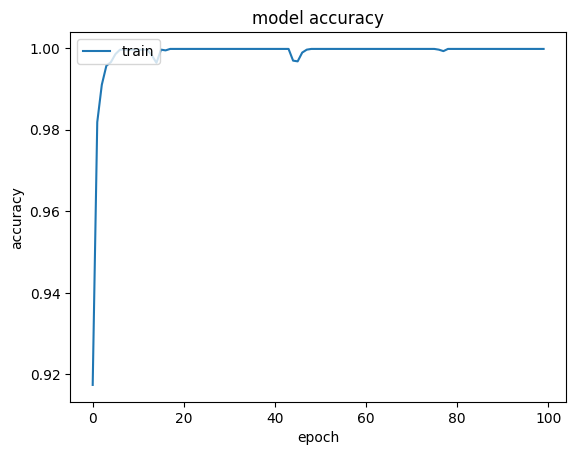

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


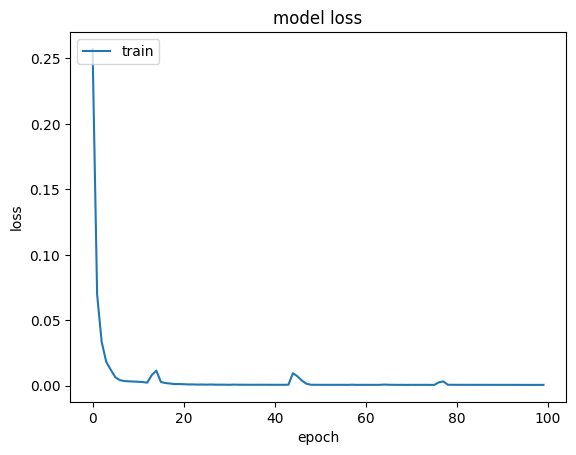

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print(model.predict([
   "rofl. its true to its name",
]))

1/1 [==============================] - 1s 629ms/step
[[1.5231032e-06]]


In [ ]:
print(model.predict([
  "this is the 2nd time we have tried 2 contact u",
]))

1/1 [==============================] - 0s 48ms/step
[[0.9999991]]


In [ ]:
# First get the weights of the embedding layer
e = model.layers[1]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(5001, 100)


# Embedding Layer Projector
http://projector.tensorflow.org/

In [ ]:
# First get the weights of the embedding layer
e = model.layers[1]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(5001, 100)


In [ ]:
import io

# Write out the embedding vectors and metadata
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, max_tokens):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
# Download the files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np

In [ ]:
# read from file in tsv format
#words = np.loadtxt('meta.tsv', skiprows=1, dtype=str)
#words

In [ ]:
# read vectors in tsv format
#vectors = np.loadtxt('vecs.tsv', skiprows=1)
#vectors

In [ ]:
# plotly scatter plot with metadata as labels
#import plotly.express as px

#fig = px.scatter(x=vectors[:,0], y=vectors[:,1], labels={'x':'x', 'y':'y'}, hover_name=words)
#fig.show()

In [ ]:
model2 = Sequential()
model2.add(Input(shape=(1,), dtype="string"))
model2.add(vectorize_layer)
model2.add(Embedding(max_tokens + 1, 2))
model2.add(SimpleRNN(16, return_sequences=True))
model2.add(SimpleRNN(16))
model2.add(Dense(16, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_2 (Text  (None, 10)                0         
 Vectorization)                                                  
                                                                 
 embedding_5 (Embedding)     (None, 10, 2)             10002     
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 10, 16)            304       
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                      

In [ ]:
model2.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
history = model2.fit(X_train, y_train, epochs=100)


Epoch 1/100
175/175 [==============================] - 5s 9ms/step - loss: 0.3617 - accuracy: 0.8726
Epoch 2/100
175/175 [==============================] - 2s 11ms/step - loss: 0.1384 - accuracy: 0.9535
Epoch 3/100
175/175 [==============================] - 2s 14ms/step - loss: 0.0727 - accuracy: 0.9801
Epoch 4/100
175/175 [==============================] - 2s 10ms/step - loss: 0.0451 - accuracy: 0.9882
Epoch 5/100
175/175 [==============================] - 2s 9ms/step - loss: 0.0317 - accuracy: 0.9916
Epoch 6/100
175/175 [==============================] - 2s 9ms/step - loss: 0.0179 - accuracy: 0.9961
Epoch 7/100
175/175 [==============================] - 2s 9ms/step - loss: 0.0155 - accuracy: 0.9953
Epoch 8/100
175/175 [==============================] - 2s 9ms/step - loss: 0.0102 - accuracy: 0.9969
Epoch 9/100
175/175 [==============================] - 2s 9ms/step - loss: 0.0053 - accuracy: 0.9989
Epoch 10/100
175/175 [==============================] - 2s 11ms/step - loss: 0.0059 - ac

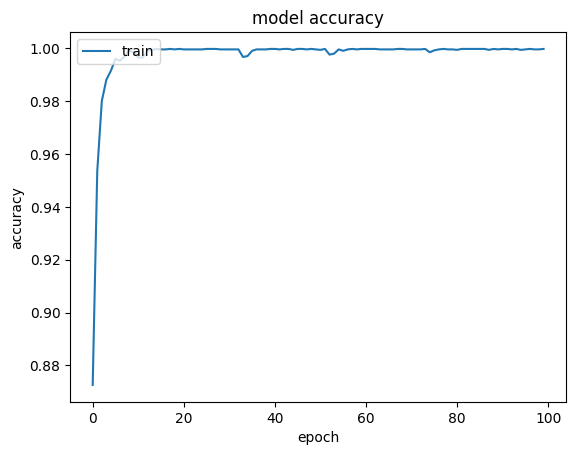

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
